In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats
import random
import numpy as np
import math


In [2]:
df2 = pd.read_excel("F:\ROMA_LOB_LOD.xlsx", sheet_name=0).iloc[0:47,:]
print(df2.shape)
df2.head(10)

(47, 10)


,Result.no,Day,Lot,Sample,rep,Blank_S/G,Blank_Conc,Blank_S/G(0.5),Blank_Conc(0.5s),rank
0,1.0,1.0,1.0,Bovine,1.0,1.313579,0.26,1.176635,0.31,69.0
1,2.0,1.0,1.0,Goat,1.0,1.211673,0.16,1.069746,0.1,35.0
2,3.0,1.0,1.0,Horse,1.0,1.264356,0.21,1.127301,0.2,59.0
3,4.0,1.0,1.0,CalF,1.0,1.072208,0.04,1.048079,0.06,28.0
4,5.0,1.0,1.0,10% BSA,1.0,1.335059,0.28,1.109935,0.17,51.0
5,6.0,1.0,1.0,SD,1.0,1.207166,0.15,1.037732,0.04,26.0
6,7.0,1.0,1.0,Bovine,2.0,1.195385,0.14,1.252299,0.49,71.0
7,8.0,1.0,1.0,Goat,2.0,1.129712,0.08,1.106876,0.16,49.0
8,9.0,1.0,1.0,Horse,2.0,1.230021,0.17,1.150997,0.25,64.0
9,10.0,1.0,1.0,CalF,2.0,1.300573,0.25,1.109364,0.17,50.0


In [3]:
# 예시, 연습용 Dataframe 형성
# blank_random = [random.random() for i in range(1,61)]
# rep = [i for i in range(1,61)]
# df2 = pd.DataFrame({'rep': rep, 'Blank_Conc' : blank_random})
# df2.head(3)

In [4]:
# df2 = pd.read_excel("F:\ROMA_LOB_LOD.xlsx", sheet_name=0).iloc[0:47,:] 컬럼이름 조정
# df2=df1.rename(columns={'Unnamed: 1' : 'rep'}).drop(columns=['Unnamed: 0']).set_index('rep')

<AxesSubplot:xlabel='Blank_Conc', ylabel='Count'>

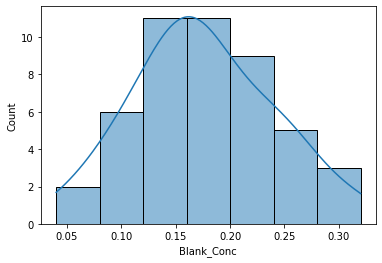

In [5]:
sns.histplot(data=df2, x='Blank_Conc', kde = True)

In [6]:
# 정규성 검정, 귀무가설: 정규성이다. 대립가설: 정규성 아니다.
p_val=stats.normaltest(df2['Blank_Conc'])[1]
p_val

0.8002680420072467

In [7]:
# 분석에 필요한 샘플수,평균값,표준편차 확인
# print(len(df2['rep']))
# print(np.mean(df2['Blank']))
# print(np.std(df2['Blank']))

In [8]:
df3 = df2.sort_values(by= 'Blank_Conc')

### LOB
 1. two reagent lot
 2. one instrument system
 3. Tree days
 4. Four blank sample -> LOB
 5. Four low measurand sample (positive) -> LOD
 6. Two replicates per sample
 7. 60 total blank (low sample) replicates per reagent , 

#### 실수에서 정수부분 소수 부분 분리하는 함수 marh.modf
a = 1.2345
math.modf(a)[0]

In [13]:
df3['rank_position'] = df3['Blank_Conc'].rank(method='dense')
df3
# df4=df3[['Blank_Conc', 'rank_position']].loc[(df3['rank_position'] == 30)]
# df4

,Result.no,Day,Lot,Sample,rep,Blank_S/G,Blank_Conc,Blank_S/G(0.5),Blank_Conc(0.5s),rank,rank_position
3,4.0,1.0,1.0,CalF,1.0,1.072208,0.04,1.048079,0.06,28.0,1.0
25,26.0,2.0,1.0,Goat,1.0,1.105118,0.06,1.058786,0.08,30.0,2.0
7,8.0,1.0,1.0,Goat,2.0,1.129712,0.08,1.106876,0.16,49.0,3.0
33,34.0,2.0,1.0,CalF,2.0,1.127773,0.08,1.063451,0.08,33.0,3.0
17,18.0,1.0,2.0,SD,1.0,1.124530,0.10,1.019878,0.01,24.0,4.0
18,19.0,1.0,2.0,Bovine,2.0,1.125279,0.10,1.096026,0.12,40.0,4.0
13,14.0,1.0,2.0,Goat,1.0,1.124309,0.10,1.156956,0.24,61.0,4.0
35,36.0,2.0,1.0,SD,2.0,1.164712,0.11,1.031756,0.03,25.0,5.0
32,33.0,2.0,1.0,Horse,2.0,1.173870,0.12,1.112651,0.17,53.0,6.0
37,38.0,2.0,2.0,Goat,1.0,1.146877,0.12,1.094444,0.12,39.0,6.0


In [23]:
# LOB ,a=bate = type
# K= Sample 종류 식을 생각해보지
B = len(df2['rep'])  # Total result of blank samples
M=df3['Blank_Conc'].mean()
SD=df3['Blank_Conc'].var()
if p_val > 0.05:
    R_P =  (0.5+B*0.95)
    if type(R_P) == float:
        df3['rank_position'] = df3['Blank_Conc'].rank(method='dense')
        f=math.modf(R_P)[0]
        n=math.modf(R_P)[1]
        LoB = df3['Blank_Conc'][n-1]+f*(df3['Blank_Conc'][n-1]-df3['Blank_Conc'][n-2])
        print('LOB는 %s 입니다.' %round(LoB,3))
else:
    c = (1.645 / (1-(1/(4*(B-6)))))
    LoB = M + c*SD
    print('LOB는 %s 입니다.' %round(LoB,3))
        
#         df4=df3[['Blank', 'rank_position']].loc[(df3['rank_position'] == round(rank_LoB))]
#         result = df4['rank_position'].tolist()[0]
#         print(df4)

LOB는 0.262 입니다.


In [11]:
# LOD 5 day, 5 sample, 최소 sample lot day 합쳐서 40 반복

# randam_LOD = [random.uniform(1,5) for i in range(1,201)]
# rep_LOD = [i for i in range(1,201)]
# df5 = pd.DataFrame({'rep':rep_LOD, 'Low_sample':randam_LOD})
# df5.head(10)

In [ ]:
# LOD_raw = pd.read_excel("F:\ROMA_LOB_LOD.xlsx", sheet_name=1).iloc[0:47,:]
lot1 = (LOD_raw['Lot'] == 1)
lot2 =(LOD_raw['Lot'] == 2)
cond1 = (LOD_raw['Sample'] == 'L1')
cond2 = (LOD_raw['Sample'] == 'L2')
cond3 = (LOD_raw['Sample'] == 'L3')
cond4 = (LOD_raw['Sample'] == 'L4')

lot1_L1 = LOD_raw.loc[lot1&cond1]
lot1_L2 = LOD_raw.loc[lot1&cond2]
lot1_L3 = LOD_raw.loc[lot1&cond3]
lot1_L4 = LOD_raw.loc[lot1&cond4]

lot2_L1 = LOD_raw.loc[lot2&cond1]
lot2_L2 = LOD_raw.loc[lot2&cond2]
lot2_L3 = LOD_raw.loc[lot2&cond3]
lot2_L4 = LOD_raw.loc[lot2&cond4]


SD1_1=lot1_L1['LOW_Conc'].std()
SD1_2=lot1_L2['LOW_Conc'].std()
SD1_3=lot1_L3['LOW_Conc'].std()
SD1_4=lot1_L4['LOW_Conc'].std()

SD2_1=lot2_L1['LOW_Conc'].std()
SD2_2=lot2_L2['LOW_Conc'].std()
SD2_3=lot2_L3['LOW_Conc'].std()
SD2_4=lot2_L4['LOW_Conc'].std()

LOD_SD = pd.DataFrame({'LOT1':[SD1_1,SD1_2,SD1_3,SD1_4], 'LOT2' : [SD2_1,SD2_2,SD2_3,SD2_4]})
# LOD_raw.loc(cond1)
LOD_SD

In [ ]:
# 정규성 확인
sns.histplot(data=LOD_raw, x='LOW_Conc', kde=True)

In [18]:
# 정규성 검정 : 귀무-정규성을 갖는다

p_low_sample = stats.normaltest(LOD_raw['LOW_Conc'])
p_low_sample[1]

0.022007066268082107

In [19]:
# L : total number, J : Low sample numder
L=len(LOD_raw.index)
J=LOD_raw['Sample'].nunique()
N=LOD_raw['Sample'].value_counts()[0]

LOT1_SDL= math.sqrt(np.sum((N-1)*LOD_SD**2)[0]/(N-1)*J)
LOT2_SDL= math.sqrt(np.sum((N-1)*LOD_SD**2)[1]/(N-1)*J)

In [20]:
LOD_raw
LOD_SD
c = (1.645/(1-(1/(4*(L-N)))))
LoD1 = LoB + c*LOT1_SDL
LoD2 = LoB + c*LOT2_SDL

print('LoD 값은 %s 입니다.' %round(max([LoD1,LoD2]),3))

LoD 값은 19.944 입니다.


In [36]:
!git init

Reinitialized existing Git repository in C:/Users/pcl/Roma_raw/.git/


In [41]:
!git add Sensitivity(LOB,D).ipynb

The file will have its original line endings in your working directory


In [42]:
!git status

On branch main
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   1.2(Python)_Reference_Value/.ipynb_checkpoints/HE4,CA125_expected_values-checkpoint.ipynb
	new file:   1.2(Python)_Reference_Value/HE4,CA125_expected_values.ipynb
	new file:   HE4,CA125_expected_values.ipynb
	new file:   Sensitivity(LOB,D).ipynb

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    ".ipynb_checkpoints/expected \352\267\270\353\236\230\355\224\204-checkpoint.ipynb"
	deleted:    "1.1(Python)_Analytical_Sensitivity/.ipynb_checkpoints/LOB,D,Q \353\266\204\354\204\235-checkpoint.ipynb"
	deleted:    "1.1(Python)_Analytical_Sensitivity/LOB,D,Q \353\266\204\354\204\235.ipynb"
	deleted:    1.2(Python)_Reference_Value/.ipynb_checkpoints/HE4,CA125_expected_values-checkpoint.ipynb
	deleted:    1.2(Python)_Reference_Value/HE4,CA125_expected_values.ipynb


In [43]:
!git commit -m "second commit"

[main 86b53da] second commit
 4 files changed, 5536 insertions(+)
 create mode 100644 1.2(Python)_Reference_Value/.ipynb_checkpoints/HE4,CA125_expected_values-checkpoint.ipynb
 create mode 100644 1.2(Python)_Reference_Value/HE4,CA125_expected_values.ipynb
 create mode 100644 HE4,CA125_expected_values.ipynb
 create mode 100644 Sensitivity(LOB,D).ipynb


In [45]:
!git branch -M main

In [44]:
!git remote remove origin 

In [46]:
!git remote add origin https://github.com/EunSuLim1/Analytical-Clinical_performance.git

In [47]:
!git push origin main

To https://github.com/EunSuLim1/Analytical-Clinical_performance.git
 * [new branch]      main -> main
